In [1]:
import pandas as pd
import io
import requests

## Time series data

We'll look at how to analyze time series data using some sample data on air quality from [here](https://github.com/pandas-dev/pandas/blob/main/doc/data/air_quality_no2_long.csv).

In [2]:
# download using requests and load into dataframe

# ha, I forgot Pandas added support for reading csv's from urls! no need for this line
# df = pd.read_csv(io.StringIO(requests.get('https://github.com/pandas-dev/pandas/raw/main/doc/data/air_quality_no2_long.csv').content.decode('utf-8')))
# this is much simpler.
df = pd.read_csv('https://github.com/pandas-dev/pandas/raw/main/doc/data/air_quality_no2_long.csv')
df = df.rename(columns={'date.utc':'date'})
df

,city,country,date,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³
...,...,...,...,...,...,...,...
2063,London,GB,2019-05-07 06:00:00+00:00,London Westminster,no2,26.0,µg/m³
2064,London,GB,2019-05-07 04:00:00+00:00,London Westminster,no2,16.0,µg/m³
2065,London,GB,2019-05-07 03:00:00+00:00,London Westminster,no2,19.0,µg/m³
2066,London,GB,2019-05-07 02:00:00+00:00,London Westminster,no2,19.0,µg/m³


In [31]:
# what type is date? an object.
df.date

0       2019-06-21 00:00:00+00:00
1       2019-06-20 23:00:00+00:00
2       2019-06-20 22:00:00+00:00
3       2019-06-20 21:00:00+00:00
4       2019-06-20 20:00:00+00:00
                  ...            
2063    2019-05-07 06:00:00+00:00
2064    2019-05-07 04:00:00+00:00
2065    2019-05-07 03:00:00+00:00
2066    2019-05-07 02:00:00+00:00
2067    2019-05-07 01:00:00+00:00
Name: date, Length: 2068, dtype: object

In [32]:
# let's make it a real date.
df['date'] = pd.to_datetime(df['date'])
df.date

0      2019-06-21 00:00:00+00:00
1      2019-06-20 23:00:00+00:00
2      2019-06-20 22:00:00+00:00
3      2019-06-20 21:00:00+00:00
4      2019-06-20 20:00:00+00:00
                  ...           
2063   2019-05-07 06:00:00+00:00
2064   2019-05-07 04:00:00+00:00
2065   2019-05-07 03:00:00+00:00
2066   2019-05-07 02:00:00+00:00
2067   2019-05-07 01:00:00+00:00
Name: date, Length: 2068, dtype: datetime64[ns, UTC]

In [33]:
# by setting the date to be the index, we can start slicing by date more easily.
df = df.set_index('date')
# let's also sort by date
df = df.sort_index()
df

,city,country,location,parameter,value,unit
date,,,,,,
2019-05-07 01:00:00+00:00,London,GB,London Westminster,no2,23.0,µg/m³
2019-05-07 01:00:00+00:00,Antwerpen,BE,BETR801,no2,50.5,µg/m³
2019-05-07 01:00:00+00:00,Paris,FR,FR04014,no2,25.0,µg/m³
2019-05-07 02:00:00+00:00,Paris,FR,FR04014,no2,27.7,µg/m³
2019-05-07 02:00:00+00:00,London,GB,London Westminster,no2,19.0,µg/m³
...,...,...,...,...,...,...
2019-06-20 20:00:00+00:00,Paris,FR,FR04014,no2,21.4,µg/m³
2019-06-20 21:00:00+00:00,Paris,FR,FR04014,no2,24.9,µg/m³
2019-06-20 22:00:00+00:00,Paris,FR,FR04014,no2,26.5,µg/m³


In [36]:
df['2019-05-08':'2019-05-10']

,city,country,location,parameter,value,unit
date,,,,,,
2019-05-08 00:00:00+00:00,Paris,FR,FR04014,no2,22.1,µg/m³
2019-05-08 00:00:00+00:00,London,GB,London Westminster,no2,19.0,µg/m³
2019-05-08 01:00:00+00:00,Paris,FR,FR04014,no2,19.6,µg/m³
2019-05-08 01:00:00+00:00,Antwerpen,BE,BETR801,no2,23.0,µg/m³
2019-05-08 01:00:00+00:00,London,GB,London Westminster,no2,19.0,µg/m³
...,...,...,...,...,...,...
2019-05-10 21:00:00+00:00,London,GB,London Westminster,no2,29.0,µg/m³
2019-05-10 22:00:00+00:00,Paris,FR,FR04014,no2,28.1,µg/m³
2019-05-10 22:00:00+00:00,London,GB,London Westminster,no2,31.0,µg/m³


In [37]:
# now we can do things like group by day using the .resample command
# this reports the average air quality value by day
df.resample('1D').value.mean()

date
2019-05-07 00:00:00+00:00    29.200000
2019-05-08 00:00:00+00:00    25.587755
2019-05-09 00:00:00+00:00    35.400000
2019-05-10 00:00:00+00:00    32.270000
2019-05-11 00:00:00+00:00    28.628571
2019-05-12 00:00:00+00:00    22.742000
2019-05-13 00:00:00+00:00    24.898000
2019-05-14 00:00:00+00:00    25.006000
2019-05-15 00:00:00+00:00    25.840816
2019-05-16 00:00:00+00:00    26.466667
2019-05-17 00:00:00+00:00    32.052083
2019-05-18 00:00:00+00:00    31.247273
2019-05-19 00:00:00+00:00    29.411111
2019-05-20 00:00:00+00:00    28.071875
2019-05-21 00:00:00+00:00    34.516327
2019-05-22 00:00:00+00:00    35.853061
2019-05-23 00:00:00+00:00    39.902041
2019-05-24 00:00:00+00:00    32.254167
2019-05-25 00:00:00+00:00    31.519565
2019-05-26 00:00:00+00:00    21.914286
2019-05-27 00:00:00+00:00    19.957143
2019-05-28 00:00:00+00:00    21.156250
2019-05-29 00:00:00+00:00    19.387755
2019-05-30 00:00:00+00:00    15.179592
2019-05-31 00:00:00+00:00    26.024490
2019-06-01 00:00:00+

<Axes: xlabel='date'>

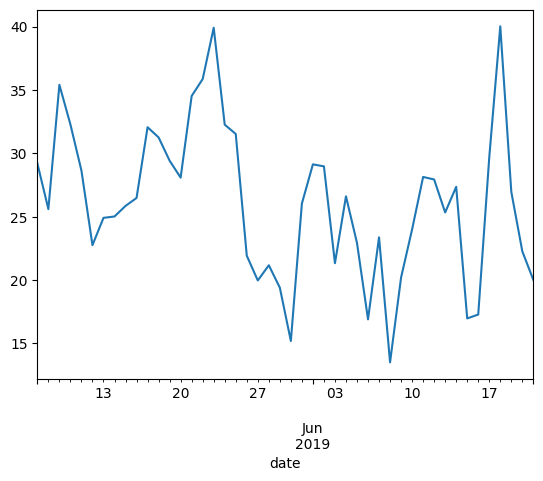

In [39]:
# and plot works
df.resample('1D').value.mean().plot()

In [25]:
# while resample groups by a time range, rolling will compute a moving average
df.rolling('3D').value.mean()
# notice that we have values for each time in the original data, but these values are averages of 3 days.

date
2019-05-07 01:00:00+00:00    23.000000
2019-05-07 01:00:00+00:00    36.750000
2019-05-07 01:00:00+00:00    32.833333
2019-05-07 02:00:00+00:00    31.550000
2019-05-07 02:00:00+00:00    29.040000
                               ...    
2019-06-20 20:00:00+00:00    34.934615
2019-06-20 21:00:00+00:00    34.419231
2019-06-20 22:00:00+00:00    33.476923
2019-06-20 23:00:00+00:00    31.496154
2019-06-21 00:00:00+00:00    29.719231
Name: value, Length: 2068, dtype: float64

<Axes: xlabel='date'>

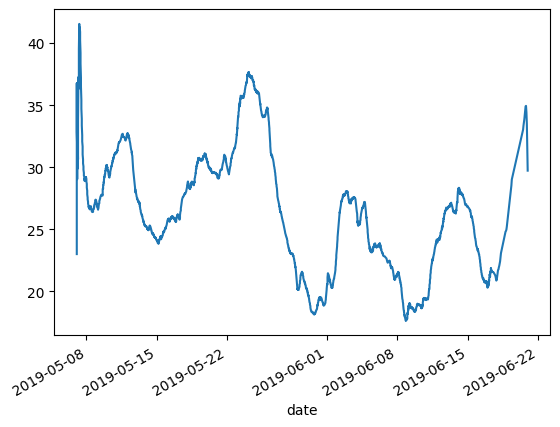

In [40]:
df.rolling('3D').value.mean().plot()

<Axes: xlabel='date'>

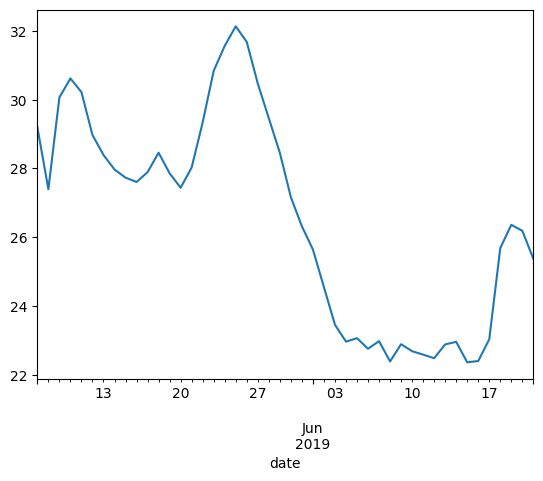

In [49]:
df.resample('1D').value.mean().rolling('10D').mean().plot()